# KNN From scratch

k-Nearest Neighbors (KNN) is a supervised machine learning algorithm that can be used for either regression or classification tasks. KNN is non-parametric, which means that the algorithm does not make assumptions about the underlying distributions of the data unlike linear regression for which we have to find the function that describes releationshiop between independent and dependent features. 

<img src="https://miro.medium.com/max/2112/1*9mN0mO61lmoj0-95i-vV7A.png" height='700px' width='750px' align='center'/>

## Calculating distance

The distance between points are determined by several versions of Minkowski distance formula. The general formula is as follows:
<img src='https://i.stack.imgur.com/U6qGk.png' alt='Minkowski formula' height='300px' width='350px'/>
Where Xi and Xj are data points, n is the number of parameters and p is the Minkowski power parameter. When p=1 it is called Manhattan distance(or taxicab) and when p=2 it is called Euclidean distance.
<img src='https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/07/01130416/june-30-hierarchical-clustering-infograph-for-blog-4.png' alt='Manhattan & Euc distance' height='650px' width='650px'/>

## Loading dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Seprate X and y data
X = df.drop('target', axis=1) # axis=1 or axis='column'
y = iris.target

### 1. Define a function to calculate distance between two points

In [29]:
def minkowski_distance(a, b, p=1):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=1)

0.6999999999999993

### 2. Use the distance function to get distance between a test point and all known data points

In [37]:
# Create an arbitrary point
test_pt = [4.8, 2.7, 2.5, 0.7]

# Create a distance list to store the distance between the arbitrary pt and test points
distances = []

for i in X.index:
    distances.append(minkowski_distance(a=test_pt, b=X.iloc[i], p=1))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7
...,...
145,6.5
146,5.4
147,6.0
148,6.6


### 3. Sort distance measurements to find the points closest to the test point

In [42]:
# finding the closes points to the test data and storing only top 5 points
df_nn = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nn

,dist
98,1.4
57,1.5
93,1.7
24,1.8
30,1.8


### 4. Use majority class labels of those closest points to predict the label of the test point

In [71]:
from collections import Counter

# Counter to keep track of labels that concide with the nearest neighbour points.
counter = Counter(y[df_nn.index])
print(y[df_nn.index])
print(counter)

# Most common will return most commonly occuring label
print(counter.most_common())
print(f'Most common label or majority class: {counter.most_common()[0][0]}')

[1 1 1 0 0]
Counter({1: 3, 0: 2})
[(1, 3), (0, 2)]
Most common label or majority class: 1


### 5. Repeat steps 1 through 4 until all test data points are classified

First we split X and y into train and test data. After splitting we will use StandardScaler to standardize data. Following formula is for StandardScaler:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/standardisation.jpg' alt='StandardScaler' height='200px' width='250px' />

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creating knn_predict function to take all the training and testing data and return the corresponding labels

In [117]:
def knn_predict(X_train, X_test, y_train, y_yest, k=5, p=1):
    # list to store all the predictions labels made by knn
    y_test_pred = []
    
    for test_pt in X_test:
        # list to store all the distances between testing pt and all training point 
        distances = []
        
        for train_point in X_train:
            distances.append(minkowski_distance(a=test_pt, b=train_point, p=p))
            
        # Create dataframe for distances
        df_dists = pd.DataFrame(data=distances, columns=['dist'], index= range(len(y_train)))

        # Sort distances and consider only the k points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # create counter object to track all the labels of k closest points
        y_train = np.array(y_train)
        counter = Counter(y_train[df_nn.index])

        # Get most common label
        prediction = counter.most_common()[0][0]
        
        y_test_pred.append(prediction)
    
    return y_test_pred

In [118]:
predictions = knn_predict(X_train, X_test, y_train, y_test, k=5, p=1)
print(predictions)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0]


### calculating accuracy

In [119]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

1.0


### Checking model accuracy with sklearn KNeighboursClassifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=1)
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

print(f'sklearn accuracy for iris DS : {accuracy_score(y_test, y_pred_test)}')

sklearn accuracy for iris DS : 1.0


### Effect of varying K

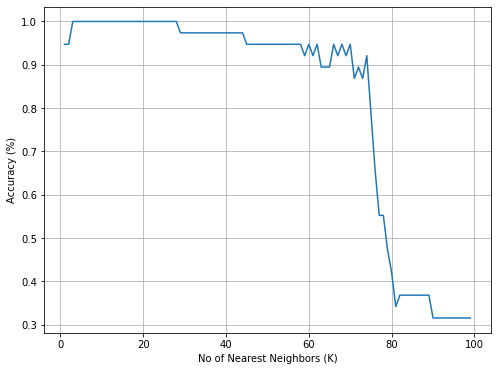

In [123]:
# obtaining accuracy score for varying k from 1 to 99

accuracy_scores = []

for k in range(1, 100):
    y_pred = knn_predict(X_train, X_test, y_train, y_test, k=k, p=1)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    

# Plotting the results
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracy_scores)
ax.set_xlabel('No of Nearest Neighbors (K)')
ax.grid()
ax.set_ylabel('Accuracy (%)');

From above we can observe that using value of K less than 30 gives us accuracy of 1 and k more than 70 will drastically drop the accuracy score.

# Weighted KNN

In weighted KNN we will also consider some weights to the class labels as some points may be far from the new points but because of more numbers of negative or opposite class considered in K we wrongly classify the point. Following is the example of this problem:
<img src='https://aiaspirant.com/wp-content/uploads/2019/09/weighted-knn2-298x300.png' alt='WeightedKNN'/>

In [195]:
def weighted_KNN(X_train, X_test, y_train, y_test, k=5, p=1):
    y_predictions = list()
    
    for test_pt in X_test:
        distances = list()
        
        for train_pt in X_train:
            distances.append(minkowski_distance(a=train_pt, b=test_pt, p=p))
            
        # creating datafram for distances
        df_dists = pd.DataFrame(data=distances, columns=['dist'], index=range(len(y_train)))
        
        # sort distances and consider only k nearest points
        df_nn = df_dists.sort_values(by='dist', axis=0)[:k]
        
        # reference for fromkeys : https://www.w3schools.com/python/ref_dictionary_fromkeys.asp
        classes = dict.fromkeys(iris.target, 0)
        
        # looping in all the top k neighbors and adding (1/distance) to the corresponding class key 
        for i, cls_key in enumerate(y_train[df_nn.index]):
            classes[cls_key] += round((1/df_nn.iloc[i].item()), 3)

        # get most common points
        prediction = max(classes, key=classes. get)
        
        # appending prediction to y_predictions
        y_predictions.append(prediction)
        
    return y_predictions

In [197]:
predictions = weighted_KNN(X_train, X_test, y_train, y_test, k=5, p=1)
print(predictions)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0]


### Calculating weighted KNN accuracy

In [198]:
print(accuracy_score(predictions, y_test))

1.0


### Effects of varying K

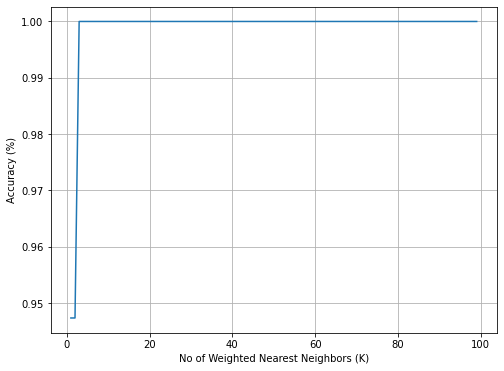

In [199]:
# obtaining accuracy score for varying k from 1 to 99

accuracy_scores = []

for k in range(1, 100):
    y_pred = weighted_KNN(X_train, X_test, y_train, y_test, k=k, p=1)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    

# Plotting the results
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracy_scores)
ax.set_xlabel('No of Weighted Nearest Neighbors (K)')
ax.grid()
ax.set_ylabel('Accuracy (%)');

##### The true power of weighted KNN we can see here, the accuracy is just mind blowing for all K's. But we should always see where weighted KNN is helpful and where not. This dataset is quite small and it may not always give this type of accuracy.